# 03-Fashion

![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Lauren Fleischmann](https://unsplash.com/photos/R2aodqJn3b8)

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

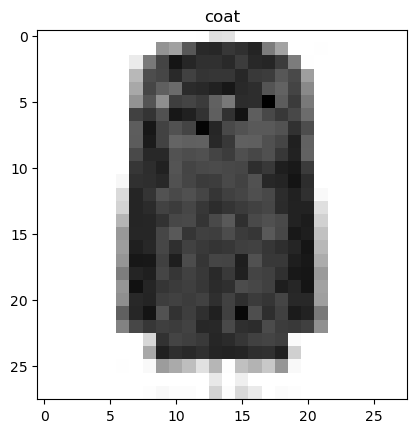

In [2]:
# TODO: Explore the data, display some input images
### STRIP_START ###
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])
plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()
### STRIP_END ###

**Before going further**: what methods could you use to perform such a classification task?

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [3]:
# TODO: Make the data preparation
### STRIP_START ###
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train/255.
X_test_norm = X_test/255.

# X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], np.prod(X_train_norm.shape[1:]))
# X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], np.prod(X_test_norm.shape[1:]))

X_train_norm = X_train_norm.reshape(-1, 28, 28, 1)
X_test_norm = X_test_norm.reshape(-1, 28, 28, 1)


### STRIP_END ###

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [4]:
# TODO: Build your model
### STRIP_START ###

# Résumé du modèle

# Ton CNN suit ce schéma logique :

# Convolution + ReLU

# Pooling

# Convolution + ReLU

# Pooling

# Flatten

# Dense cachée

# Dense de sortie (softmax)

# initialisation du modele
model = tf.keras.models.Sequential()


# # Couche convolutionnelle + activation ReLU
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# # Couche de pooling
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# # Deuxième couche convolutionnelle + pooling
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


# Aplatir les cartes de caractéristiques pour la couche dense
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))

# Couches denses (fully connected)
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 10 classes pour Fashion MNIST






### STRIP_END ###

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [5]:
# TODO: Compile and fit your model

### STRIP_START ###
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 
model.summary()

model.fit(X_train_norm, y_train_cat,epochs=20,  validation_data=(X_test_norm, y_test_cat),batch_size=32)


### STRIP_END ###

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8292 - loss: 0.4686 - val_accuracy: 0.8602 - val_loss: 0.3901
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8895 - loss: 0.3046 - val_accuracy: 0.8924 - val_loss: 0.2912
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9062 - loss: 0.2551 - val_accuracy: 0.8901 - val_loss: 0.2903
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9154 - loss: 0.2242 - val_accuracy: 0.8851 - val_loss: 0.3042
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9256 - loss: 0.1992 - val_accuracy: 0.9079 - val_loss: 0.2631
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9324 - loss: 0.1782 - val_accuracy: 0.9087 - val_loss: 0.2513
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9392 - loss: 0.1595 - val_accuracy: 0.9104 - val_loss: 0.2557
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9454 -

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [6]:
# TODO: Compute the accuracy of your model
### STRIP_START ###
#evaluation du modele
loss, accuracy = model.evaluate(X_test_norm, y_test_cat)

print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")


### STRIP_END ###

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9079 - loss: 0.4498
Loss : 0.4497813582420349
Accuracy : 0.9078999757766724


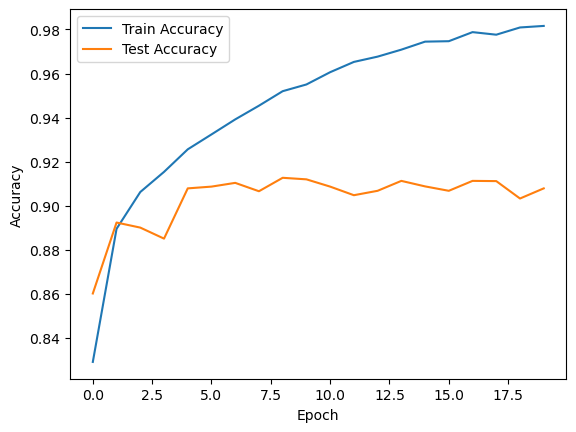

In [7]:
#visualisation des performance de l'entrainement
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Test Accuracy')  
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

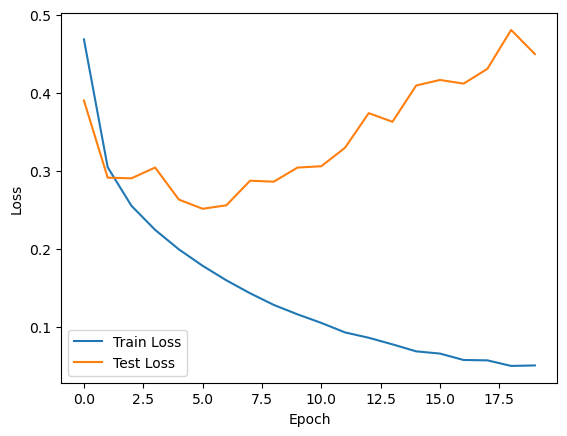

In [8]:
#pour voir l'evaluation de perte pendant l'entrainement
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


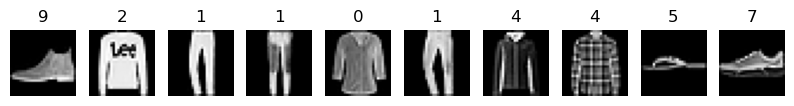

In [9]:
#affichage de predictions pou les 10 premires images du jeu de test
predictions = model.predict(X_test_norm[:10])
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()    

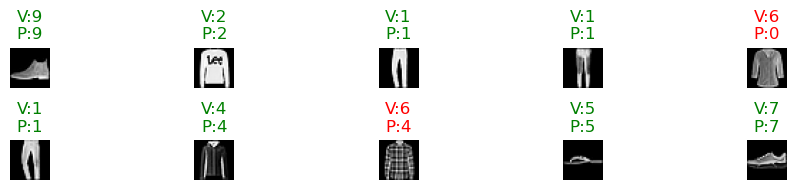

In [10]:
#le texte est en vert si la prédiction est correcte ✅  et en rouge sinon ❌

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    true_label = y_test[i]
    pred_label = np.argmax(predictions[i])
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"V:{true_label}\nP:{pred_label}", color=color)  # V=Vrai, P=Prédit
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
predictions = model.predict(X_test_norm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you will perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [12]:
# TODO: Redo the classification with PCA and classification model
### STRIP_START ###
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1️⃣ Aplatir les images pour les modèles classiques
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.

# 2️⃣ Réduction de dimension avec PCA
pca = PCA(n_components=100)  # tu peux ajuster ce nombre
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# 3️⃣ Modèle classique : SVM
svm = SVC()

# 4️⃣ Hyperparameter tuning avec GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train_pca, y_train)

# 5️⃣ Résultats
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_pca)

print("Best parameters:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


### STRIP_END ### 

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.8998

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.76      0.71      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Did the neural network improve significantly the performances? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.